#INSURANCE CHARGES PREDICTION

🙋‍♀️ **`Author`** : Sonia firdous

📧 **`Email`**: soniafirdous1985@gmail.com

🔗 **`Data Source`** :

The data was collected from the following [link](https://www.kaggle.com/datasets/mirichoi0218/insurance)

📜 **`Description:`**

Data collected from the source has following description:

The dataset contains information about individuals and their medical insurance charges. Each record includes a person’s age, gender, body mass index (BMI), number of children or dependents, smoking status, and residential region in the United States. The target variable is charges, which represents the medical insurance cost billed to the individual.

🔍 **`Purpose of Analysis:`**

The purpose of this analysis is to understand the factors that influence medical insurance charges and to build predictive models that can estimate an individual’s insurance cost based on personal and health-related attributes such as age, BMI, smoking status, and other demographic variables.

#IMPORTING LIBRARIES

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV



DATASET

In [222]:
df=pd.read_csv("/content/insurance.csv")

#📊 Exploratory Data Analysis (EDA)

DATA SET OVER VIEW

In [223]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


SHAPE

In [224]:
df.shape

(1338, 7)

In [225]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [227]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [228]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [229]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [230]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


#ANALYSIS

In [231]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# CHARGES


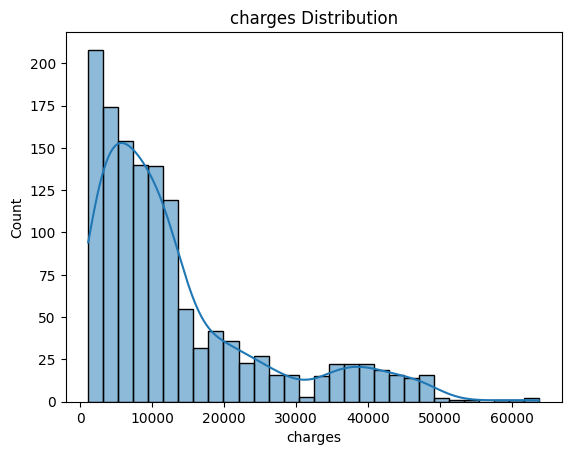

In [232]:
sns.histplot(x=df["charges"],kde=True)
plt.title("charges Distribution")
plt.show()

<Axes: xlabel='charges', ylabel='Count'>

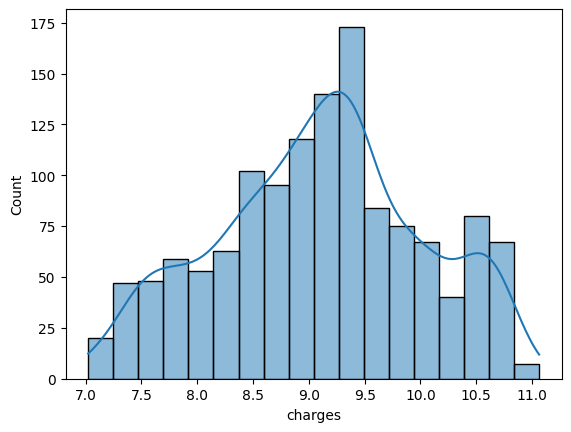

In [233]:
# applying a log transformation on the charges column
sns.histplot(np.log(df["charges"]),kde=True)

#AGE

In [234]:
df["age"].value_counts()

,count
age,
18,69
19,68
46,29
52,29
50,29
47,29
48,29
51,29
45,29


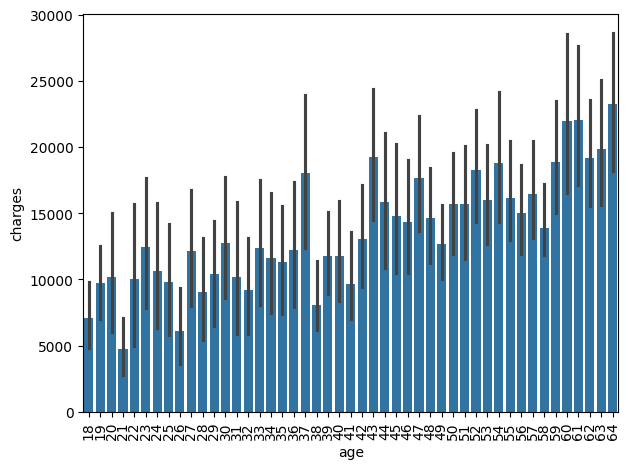

In [235]:
sns.barplot(x=df["age"],y=df["charges"])
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

In [236]:
df["age"].describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


 Distribution of Age


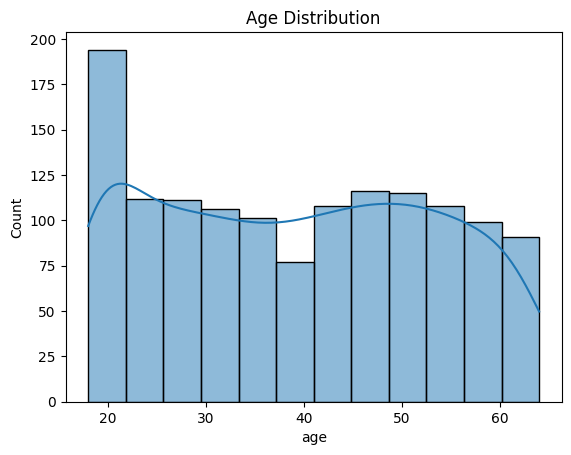

In [237]:
sns.histplot(x=df["age"],kde=True)
plt.title("Age Distribution")
plt.show()


<Axes: xlabel='age', ylabel='charges'>

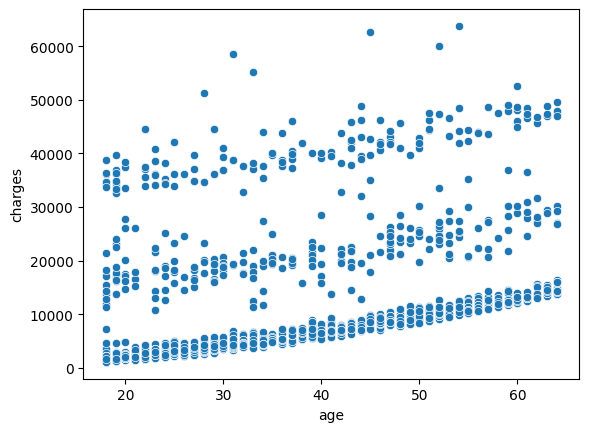

In [238]:
sns.scatterplot(x=df["age"],y=df["charges"])

SMOKER

* Smokers pay 3-4 times higher charges on average than non-smokers.

* Median smoker charges ≈ 34k, non-smoker ≈ 7k.

* Boxplot & violin plots clearly show smokers are skewed toward high charges.

* The KDE plot shows two distinct distributions — charges for smokers are shifted much higher

In [239]:
df["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [240]:
# Using lambda with apply
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)


<Axes: xlabel='smoker', ylabel='Count'>

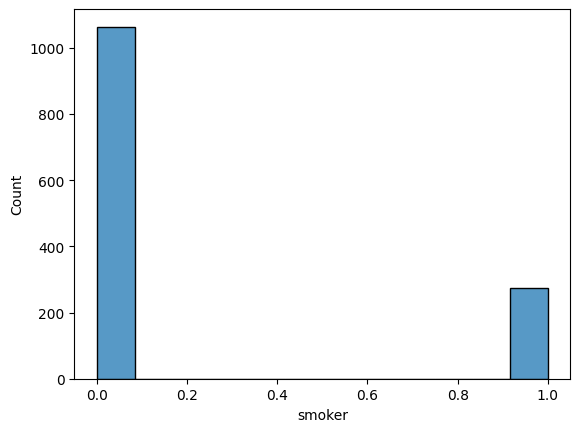

In [241]:
sns.histplot(x=df["smoker"])

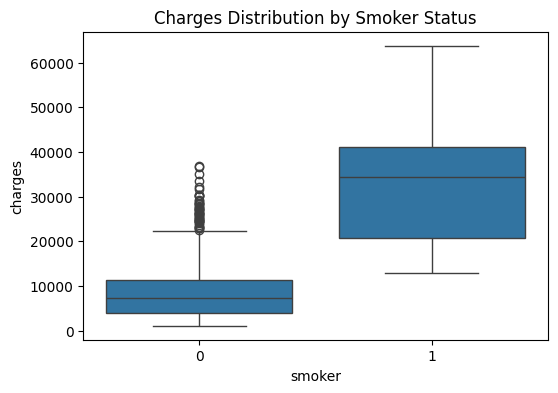

In [242]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges Distribution by Smoker Status")
plt.show()

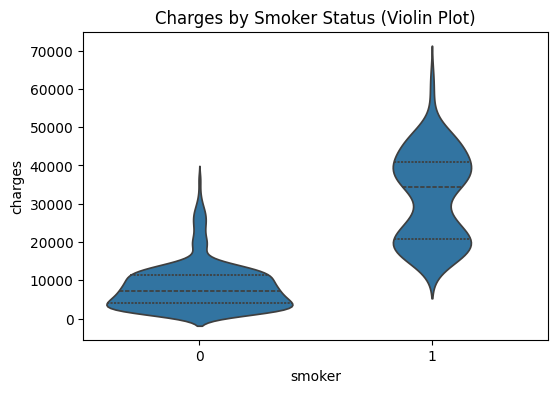

In [243]:
plt.figure(figsize=(6,4))
sns.violinplot(x='smoker', y='charges', data=df, inner="quartile")
plt.title("Charges by Smoker Status (Violin Plot)")
plt.show()


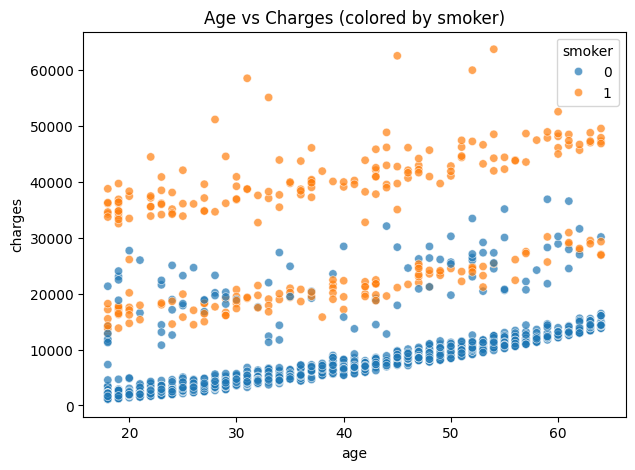

In [244]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges',hue="smoker", data=df, alpha=0.7)
plt.title("Age vs Charges (colored by smoker)")
plt.show()


In [245]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,1,southwest,16884.9240
1,18,male,33.77,1,0,southeast,1725.5523


#SEX

male=1

female=0

In [246]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)


<Axes: xlabel='sex'>

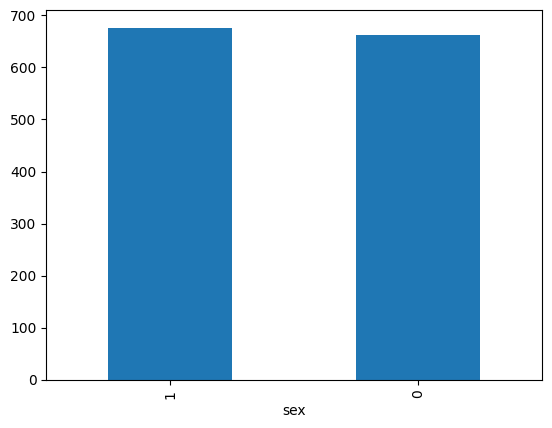

In [247]:
df["sex"].value_counts().plot(kind="bar")

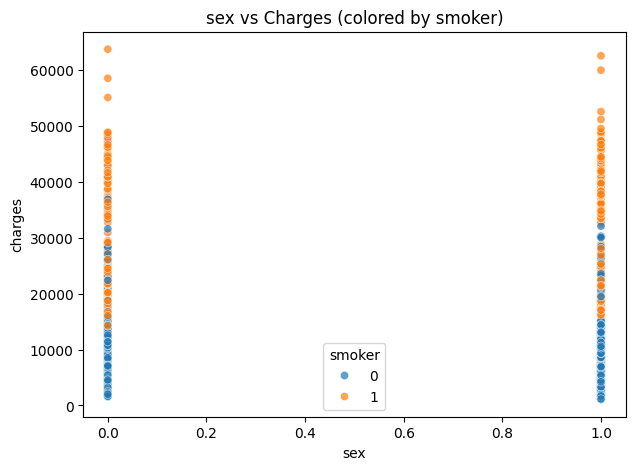

In [248]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='sex', y='charges',hue="smoker", data=df, alpha=0.7)
plt.title("sex vs Charges (colored by smoker)")
plt.show()


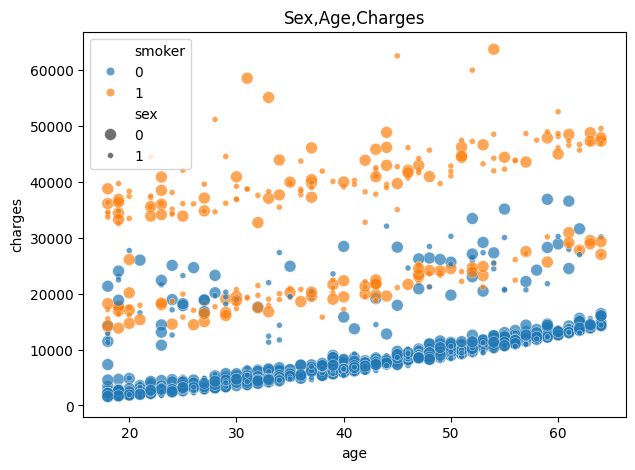

In [249]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges',hue="smoker",size="sex",data=df, alpha=0.7)
plt.title("Sex,Age,Charges")
plt.show()


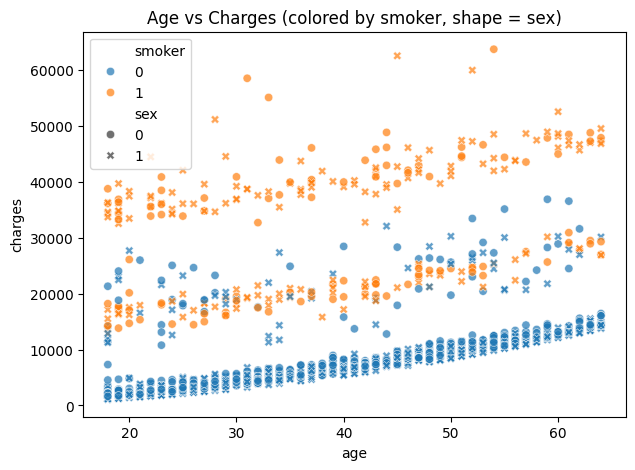

In [250]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges',
                hue="smoker", style="sex", data=df, alpha=0.7)
plt.title("Age vs Charges (colored by smoker, shape = sex)")
plt.show()

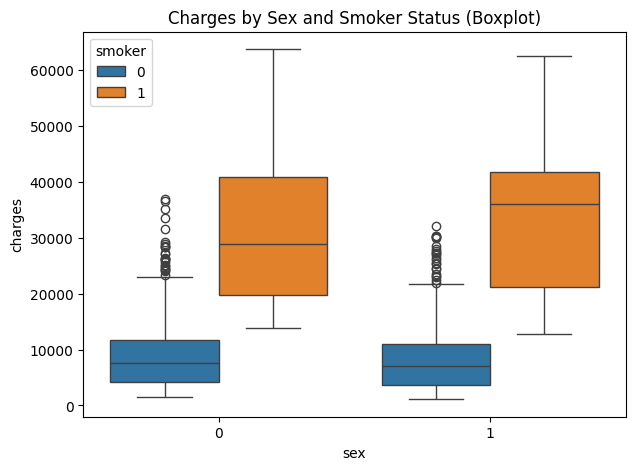

In [251]:
plt.figure(figsize=(7,5))
sns.boxplot(x='sex', y='charges', hue='smoker', data=df)
plt.title("Charges by Sex and Smoker Status (Boxplot)")
plt.show()


/tmp/ipython-input-889329656.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='charges', hue='smoker', data=df, ci=None)


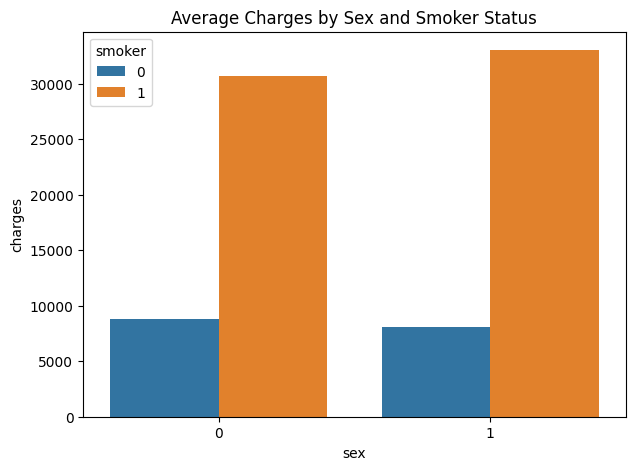

In [252]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='charges', hue='smoker', data=df, ci=None)
plt.title("Average Charges by Sex and Smoker Status")
plt.show()



In [253]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


#Bmi

In [254]:
df["bmi"].value_counts()

,count
bmi,
32.300,13
28.310,9
30.800,8
31.350,8
30.495,8
...,...
39.425,1
40.480,1
38.900,1


In [255]:
df["bmi"].describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


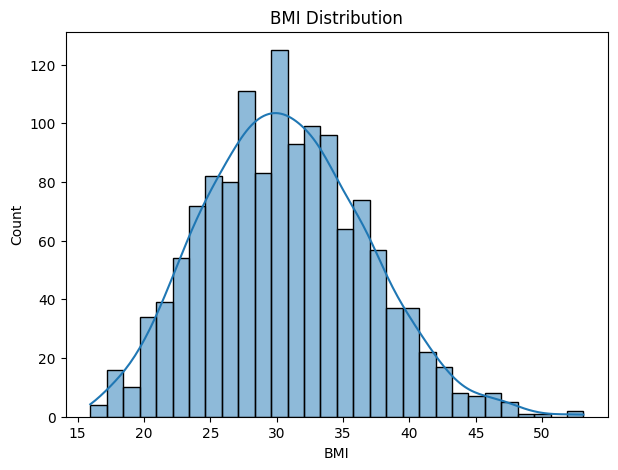

In [256]:
plt.figure(figsize=(7,5))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()


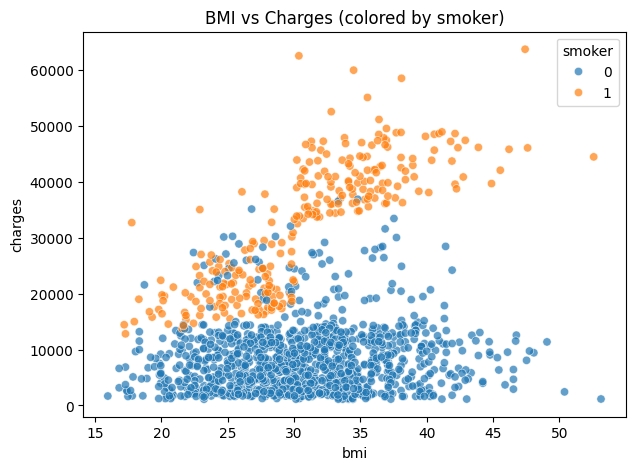

In [257]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title("BMI vs Charges (colored by smoker)")
plt.show()


In [258]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)

print(df['bmi_category'].value_counts())


bmi_category
Obese          707
Overweight     386
Normal         225
Underweight     20
Name: count, dtype: int64


<Axes: xlabel='bmi_category'>

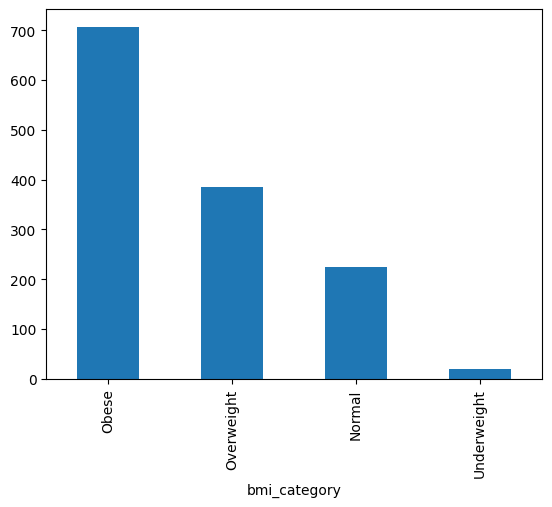

In [259]:
df["bmi_category"].value_counts().plot(kind="bar")

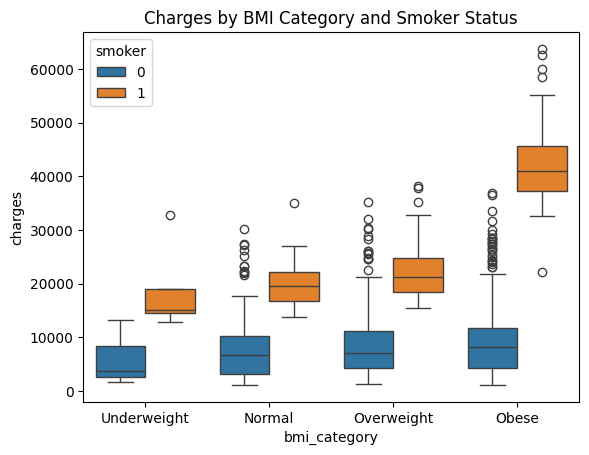

In [260]:
sns.boxplot(x='bmi_category', y='charges', hue='smoker', data=df,
            order=["Underweight","Normal","Overweight","Obese"])
plt.title("Charges by BMI Category and Smoker Status")
plt.show()


#CHILDREN

In [261]:
df["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<Axes: xlabel='children'>

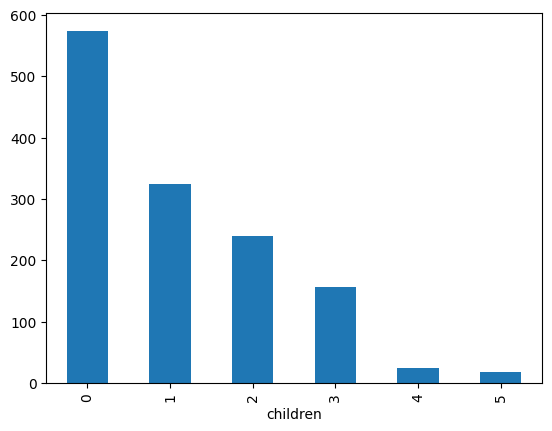

In [262]:
df["children"].value_counts().plot(kind="bar")

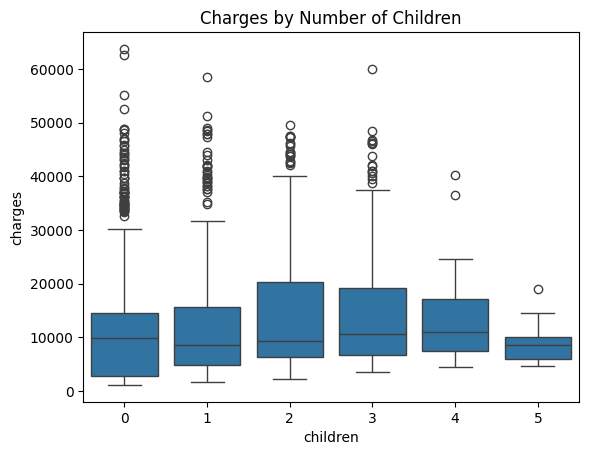

In [263]:
sns.boxplot(x='children', y='charges', data=df)
plt.title("Charges by Number of Children")
plt.show()


# REGION

In [264]:
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Axes: xlabel='region'>

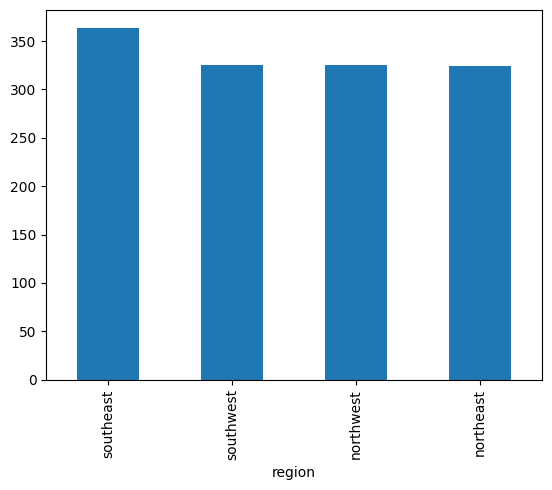

In [265]:
df["region"].value_counts().plot(kind="bar")

<Axes: xlabel='region', ylabel='charges'>

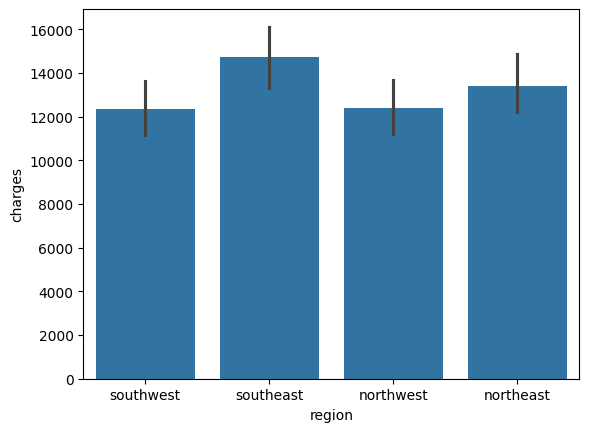

In [266]:
sns.barplot(x=df["region"],y=df["charges"])

In [267]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,0,27.90,0,1,southwest,16884.9240,Overweight
1,18,1,33.77,1,0,southeast,1725.5523,Obese


<Axes: >

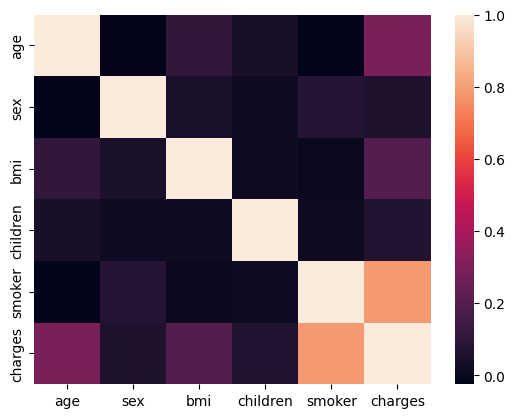

In [268]:
sns.heatmap(df.corr(numeric_only=True))

#🤖 Machine Learning Workflow

###  Features and target

In [269]:

X = df[['age','sex','bmi','children','smoker','region','bmi_category']]
y = np.log(df['charges'])

###Train Test Split

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### column transformer

* region → categorical (needs OneHotEncoding)

* bmi → numeric (we may want to scale/standardize it, since it has a wide range).

In [271]:
preprocessor = ColumnTransformer(transformers=[
    ('region_enc', OneHotEncoder(drop='first'), ['region']),
    ('bmi_cat_enc', OneHotEncoder(drop='first'), ['bmi_category']),
     ('bmi_scaler', StandardScaler(), ['bmi'])],remainder="passthrough")

In [272]:
X_train

,age,sex,bmi,children,smoker,region,bmi_category
560,46,0,19.950,2,0,northwest,Normal
1285,47,0,24.320,0,0,northeast,Normal
1142,52,0,24.860,0,0,southeast,Normal
969,39,0,34.320,5,0,southeast,Obese
486,54,0,21.470,3,0,northwest,Normal
...,...,...,...,...,...,...,...
1095,18,0,31.350,4,0,northeast,Obese
1130,39,0,23.870,5,0,southeast,Normal
1294,58,1,25.175,0,0,northeast,Overweight
860,37,0,47.600,2,1,southwest,Obese


### pipeline

In [273]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

### FIT

fit only on training data i-e encoders + scaler are fitted only on train.

In [274]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('region_enc',
                                                  OneHotEncoder(drop='first'),
                                                  ['region']),
                                                 ('bmi_cat_enc',
                                                  OneHotEncoder(drop='first'),
                                                  ['bmi_category']),
                                                 ('bmi_scaler',
                                                  StandardScaler(),
                                                  ['bmi'])])),
                ('model', LinearRegression())])

### PREDICT

applies transformations learned from train to test

In [275]:
y_pred=pipe.predict(X_test)
y_pred

array([ 9.11944278,  8.69288089, 11.08045305,  9.11245263,  9.59867631,
        8.62938796,  7.93839163,  9.60522926,  8.08584609,  9.22618214,
       10.01487523,  8.97710838,  8.365249  , 10.76837265, 10.96300948,
       10.69680292,  9.30044551, 10.66927347,  8.93982329, 10.36339061,
        8.47455235,  8.98984769,  7.97663113,  8.31435167,  9.33211078,
        9.37969883,  9.46859978,  8.66494718,  9.19319832,  7.93459308,
        9.02455823,  9.41686424,  8.12913519,  8.58208251,  8.3067588 ,
        9.0257374 ,  8.08674624,  8.85137457, 10.71699475, 10.21421791,
        8.39745236,  8.2386111 ,  9.42734104,  9.27733391,  8.65357213,
        9.31453716,  8.37981642,  8.36477328, 10.6414723 ,  8.59540303,
        9.56874312,  7.91483295,  8.96581585,  7.94189842,  9.2485838 ,
        9.35224275,  8.34909858, 10.29581874,  9.39263951,  9.34773855,
        9.55838407,  8.65336182,  9.71053328,  8.91849762,  9.30448625,
        8.3872434 ,  9.84097333,  9.24968447,  8.23590719,  8.11

### EVALUATE

In [276]:
# Evaluate
print("LR R²:",r2_score(y_test, y_pred))
print("LR MAE:",mean_absolute_error(y_test,y_pred))
print("LR MSE:",mean_squared_error(y_test,y_pred))

LR R²: 0.8028171866504255
LR MAE: 0.2750418509710998
LR MSE: 0.17729508565649485


In [291]:
np.exp(0.27) # charge diff

np.float64(1.3099644507332473)

e 0.27 ≈1.30

The predicted charges are, on average, about 30% higher or lower than the actual charges.

# VISUAL INSPECTION  LINEAR REGRESSION
# predicted vs actual charges

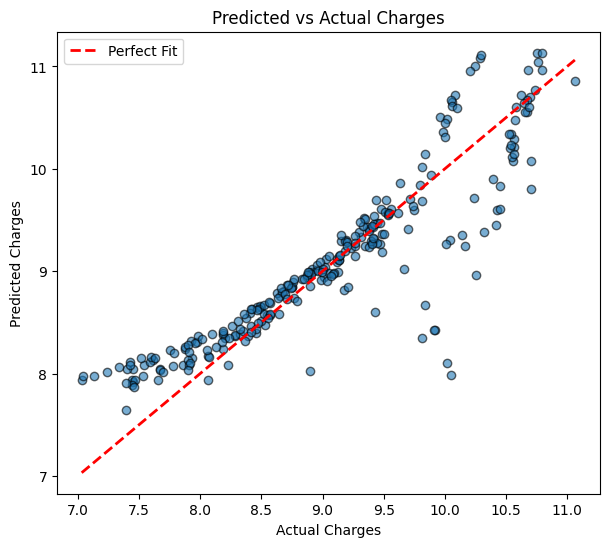

In [277]:
# Scatter plot
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor="k")

# Add reference line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Fit")

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.legend()
plt.show()


# REGULARIZATION

 Finds the best level of Ridge regularization (alpha) for your data, ensuring a balance between bias (underfitting) and variance (overfitting).

# RIDGE REGRESSION WITH GRID SEARCH CV

`ridge pipeline`

The pipeline has:

* preprocessor: your ColumnTransformer (handles encoding + scaling).

* Ridge: regression model with L2 regularization.

* max_iter=10000 ensures convergence even if data is complex.

In [278]:
ridge_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge(max_iter=10000))
])


`Hyperparameter Grid`

alpha = strength of regularization.

Small α → acts like plain LinearRegression (almost no penalty).

Large α → strong penalty, shrinks coefficients more.

"model__alpha" → model is the name of your step inside pipeline → target parameter is alpha.

In [279]:
ridge_params = {"model__alpha": [0.001, 0.01, 0.1, 1, 10, 50, 100]}


`GridSearchCV`

Runs Ridge with each alpha value.

Uses 5-fold cross-validation on the training set.

Scores each model with R² (higher = better).

n_jobs=-1 → uses all CPU cores for speed.

fit() trains the pipeline multiple times, one for each alpha

In [280]:
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('region_enc',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['region']),
                                                                        ('bmi_cat_enc',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['bmi_category']),
                                                                        ('bmi_scaler',
                                                                         StandardScaler(),
                                                                         ['bmi'])])),
                                       ('model', Ridge(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             scoring='r2')

`Best Alpha & CV Score`

best_params_ :gives best alpha (e.g., {'model__alpha': 10}).

best_score_  :best mean R² across CV folds for that alpha.

In [281]:
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge CV R²:", ridge_grid.best_score_)


Best Ridge alpha: {'model__alpha': 1}
Best Ridge CV R²: 0.751091693240832


# Lasso GridSearch

In [282]:
lasso_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Lasso(max_iter=10000))
])


In [283]:
lasso_params = {"model__alpha": [0.001, 0.01, 0.1, 1, 10]}


In [284]:
lasso_grid = GridSearchCV(lasso_pipe, lasso_params, cv=5, scoring="r2", n_jobs=-1)
lasso_grid.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('region_enc',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['region']),
                                                                        ('bmi_cat_enc',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['bmi_category']),
                                                                        ('bmi_scaler',
                                                                         StandardScaler(),
                                                                         ['bmi'])])),
                                       ('model', Lasso(max_iter=10000))]),
             n_jobs=-1, param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [285]:
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso CV R²:", lasso_grid.best_score_)


Best Lasso alpha: {'model__alpha': 0.001}
Best Lasso CV R²: 0.7508031385745413


# Evaluate Best Models on Test Set

Best models

In [286]:
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_

Predictions

In [287]:
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

Evaluation Function

R²: Shows how well the model explains variance in medical charges

MAE: Easier to interpret in terms of $ — “on average, the model is off by X dollars”

RMSE: Punishes large prediction mistakes more heavily

In [288]:
def evaluate(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)              # Variance explained (closer to 1 = better)
    mae = mean_absolute_error(y_true, y_pred) # Average absolute error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # Penalizes large errors
    print(f"\n{name} Performance on Test Set")
    print(f"R²:   {r2:.3f}")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


Compare Ridge vs Lasso

appying the evaluation fuction

In [289]:
evaluate(y_test, ridge_pred, "Ridge")
evaluate(y_test, lasso_pred, "Lasso")



Ridge Performance on Test Set
R²:   0.803
MAE:  0.28
RMSE: 0.42

Lasso Performance on Test Set
R²:   0.803
MAE:  0.27
RMSE: 0.42





---



---


#RESULTS:


---



---


**`LINEAR REGRESSION`**
LR R²: 0.8028171866504255

LR MAE: 0.2750418509710998

LR MSE: 0.17729508565649485

**`Ridge Performance on Test Set`**


R²:   0.803

MAE:  0.28

RMSE: 0.42

**`Lasso Performance on Test Set`**

R²:   0.803

MAE:  0.27

RMSE: 0.42





---



---



# INTERPRETATION:


---



---
Linear Regression

Baseline model with R² ≈ 0.803.

Performs well after log transformation, capturing most of the variance.

Simple and interpretable.

Ridge Regression

R² ≈ 0.803, almost identical to Linear Regression.

Regularization doesn’t add much benefit here, indicating multicollinearity is not a major issue.

Lasso Regression

R² ≈ 0.803, with slightly lower MAE than the other models.

Performs implicit feature selection by shrinking irrelevant coefficients to zero.

Useful for simplifying the model without losing accuracy.



---



---



# FINAL CONCLUSION:


---



---

on average, the model’s predictions are about 30% higher or lower than the actual insurance charges.

All three models perform nearly the same after log transformation. Lasso has a slight advantage in terms of generalization and feature selection, while Ridge and Linear regression provide stability and interpretability. This suggests that the dataset is well-behaved and does not suffer from strong multicollinearity or overfitting issues.